# Прокофьев Игорь Витальевич
## Группа ДПИ22-1м
## Семинар 4, вариант 1

Задание 1. Напишите программу, которая будет создавать читать данные из файла CSV и выводить их на экран в виде линейного графика. Вывести «легенду» к графикам. Отобразить на графике сетку.

Название файла – passengers.csv  
Построить графики линейные по столбцам (одновременно на одном рисунке):  passengers_avia и passengers_jd  
Постройте график распределения пассажиров по каждому году (гистограмма)  
Цвета графиков: красный, зеленый.  
Тип графиков: сплошная линия, точки.  
Подписать оси: количество пассажиров и годы.  


In [1]:
# https://campus.fa.ru/mod/folder/download_folder.php?id=351804

import matplotlib.pyplot as plt
import pandas as pd

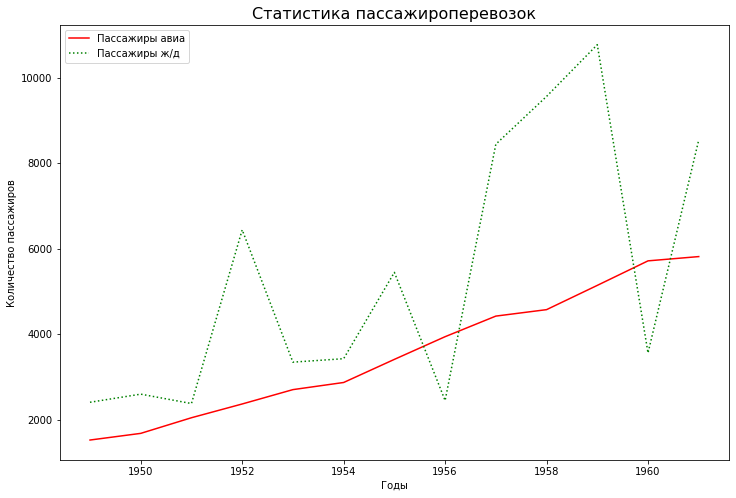

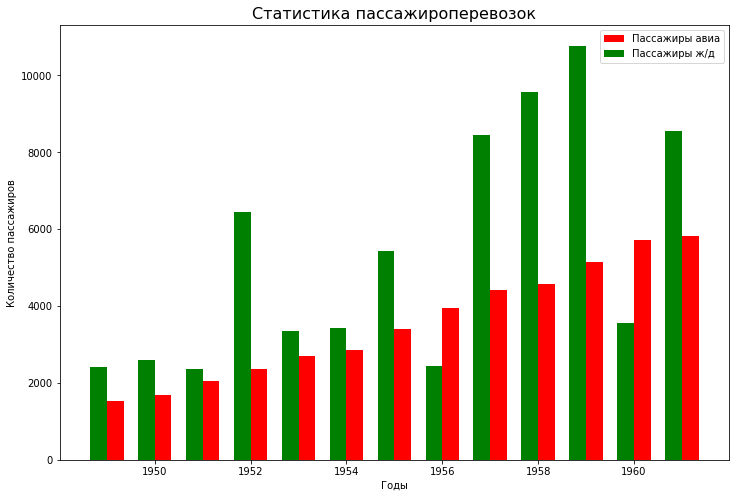

In [2]:
# Строим линейные графики

data = pd.read_csv('passengers.csv', on_bad_lines='skip')

plt.figure(figsize=(12, 8))
plt.title('Статистика пассажироперевозок', fontsize=16)
plt.xlabel('Годы')
plt.ylabel('Количество пассажиров')
plt.plot(data.year, data.passengers_avia, label='Пассажиры авиа', \
         color='red', linestyle='solid')

plt.plot(data.year, data.passengers_jd, label='Пассажиры ж/д', \
         color='green', linestyle='dotted')
plt.legend()
plt.show()
print()

# Строим столбчатую гистограмму

plt.figure(figsize=(12, 8))
plt.title('Статистика пассажироперевозок', fontsize=16)
plt.xlabel('Годы')
plt.ylabel('Количество пассажиров')
width = 0.35
plt.bar(data.year + width/2, data.passengers_avia, width, \
        label='Пассажиры авиа', color='red')
plt.bar(data.year - width/2, data.passengers_jd, width, \
        label='Пассажиры ж/д', color='green')
plt.legend()
plt.show()

Задание 2. Анализ размера цветков ириса. Построить графики по данным файла iris.csv.
- Соотношение размеров чашелистиков и лепестков (диаграмма рассеяния)
- Соотношение размеров между чашелистиками и лепестками разных видов ириса (классифицированная диаграмма рассеяния)
- Распределение размеров чашелистиков и лепестков разных видов цветов ириса (гистограмма или прямоугольная диаграмма)

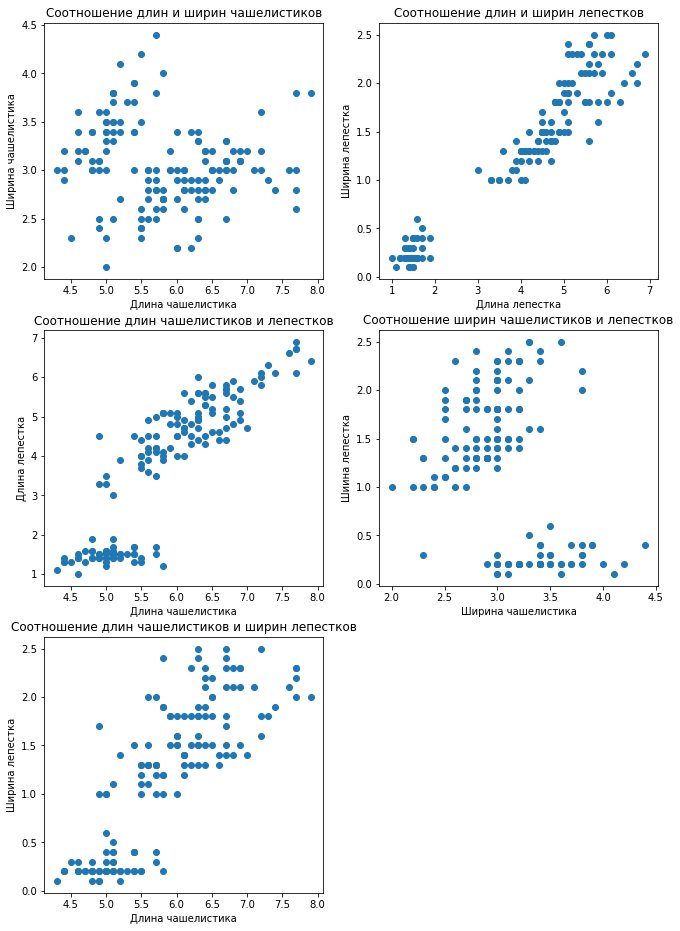

In [3]:
# Строим диаграмму рассеяния

data = pd.read_csv('iris.csv')

plt.figure(figsize=(11, 16))

plt.subplot(3, 2, 1)
plt.title('Соотношение длин и ширин чашелистиков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.scatter(data['sepal.length'], data['sepal.width'])

plt.subplot(3, 2, 2)
plt.title('Соотношение длин и ширин лепестков')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.scatter(data['petal.length'], data['petal.width'])

plt.subplot(3, 2, 3)
plt.title('Соотношение длин чашелистиков и лепестков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.scatter(data['sepal.length'], data['petal.length'])

plt.subplot(3, 2, 4)
plt.title('Соотношение ширин чашелистиков и лепестков')
plt.xlabel('Ширина чашелистика')
plt.ylabel('Шиина лепестка')
plt.scatter(data['sepal.width'], data['petal.width'])

plt.subplot(3, 2, 5)
plt.title('Соотношение длин чашелистиков и ширин лепестков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина лепестка')
plt.scatter(data['sepal.length'], data['petal.width'])

plt.show()

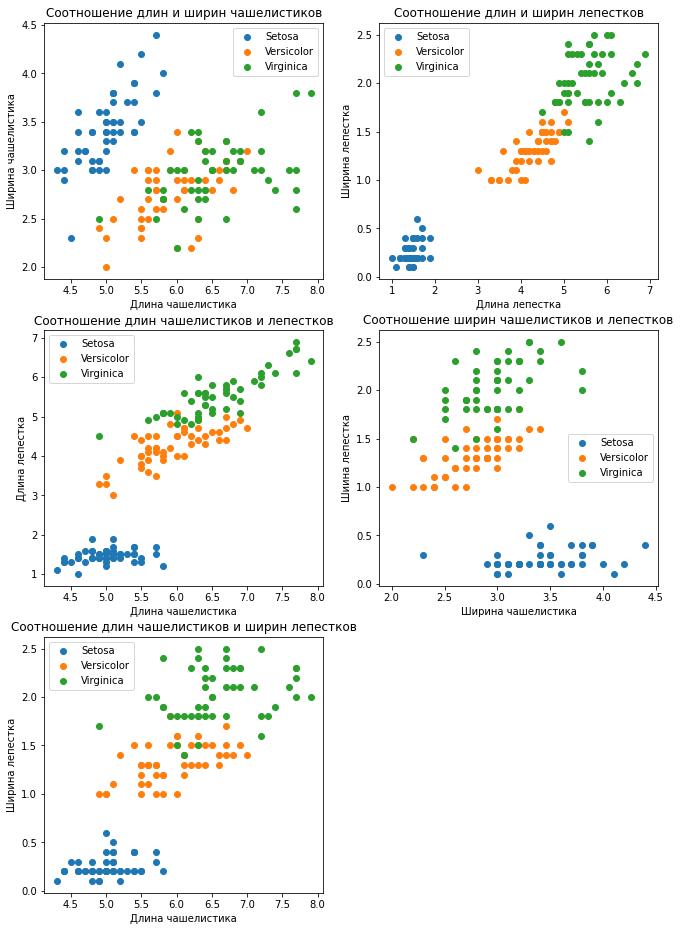

In [4]:
# Строим классифицированную диграмму рассеяния

colors_palete = {'setosa': "red", 'versicolor': "yellow", 'virginica': "blue"}

data = pd.read_csv('iris.csv')

plt.figure(figsize=(11, 16))

plt.subplot(3, 2, 1)
plt.title('Соотношение длин и ширин чашелистиков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
groups = data.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.length'], group['sepal.width'], label=name)
plt.legend()

plt.subplot(3, 2, 2)
plt.title('Соотношение длин и ширин лепестков')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
groups = data.groupby('variety')
for name, group in groups:
    plt.scatter(group['petal.length'], group['petal.width'], label=name)
plt.legend()

plt.subplot(3, 2, 3)
plt.title('Соотношение длин чашелистиков и лепестков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
groups = data.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.length'], group['petal.length'], label=name)
plt.legend()

plt.subplot(3, 2, 4)
plt.title('Соотношение ширин чашелистиков и лепестков')
plt.xlabel('Ширина чашелистика')
plt.ylabel('Шиина лепестка')
groups = data.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.width'], group['petal.width'], label=name)
plt.legend()

plt.subplot(3, 2, 5)
plt.title('Соотношение длин чашелистиков и ширин лепестков')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина лепестка')
groups = data.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.length'], group['petal.width'], label=name)
plt.legend()

plt.show()

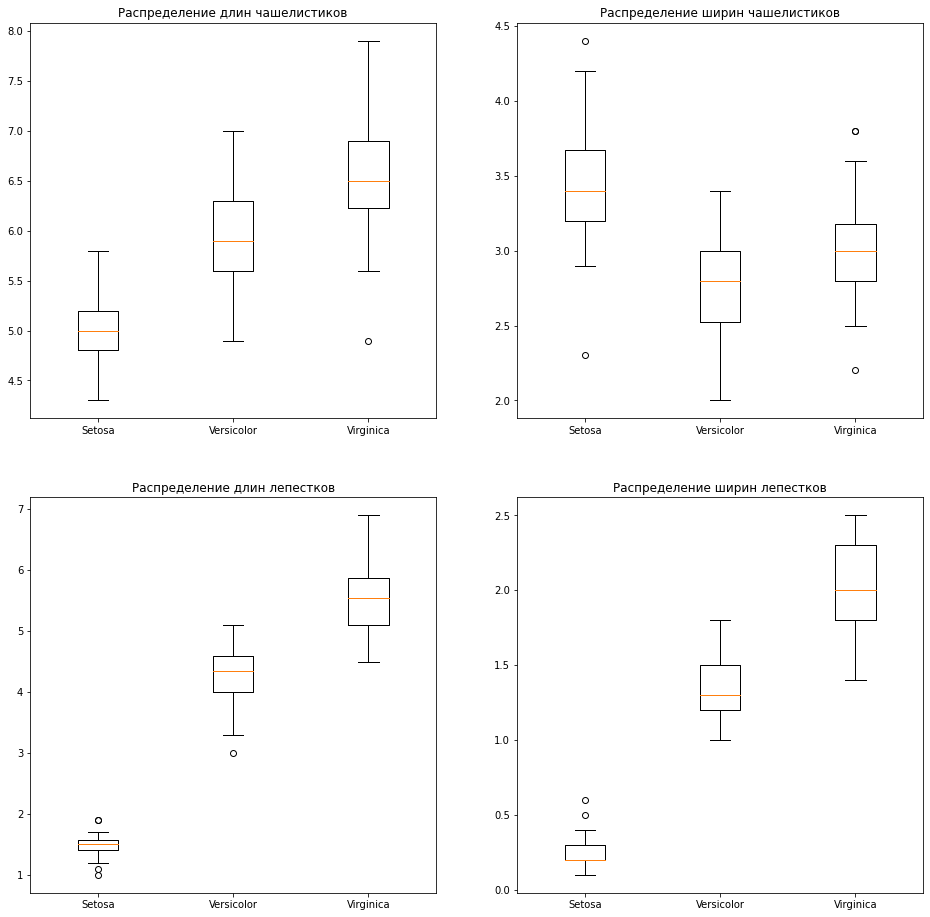

In [5]:
# Строим прямоугольную диаграмму распределения

names = data.variety.unique()
groups = [data[data.variety==names[i]] for i in range(len(names))]

sepal_length = [group['sepal.length'] for group in groups]
sepal_width = [group['sepal.width'] for group in groups]
petal_length = [group['petal.length'] for group in groups]
petal_width = [group['petal.width'] for group in groups]

plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.title('Распределение длин чашелистиков')
plt.boxplot(sepal_length, labels=names)

plt.subplot(2, 2, 2)
plt.title('Распределение ширин чашелистиков')
plt.boxplot(sepal_width, labels=names)

plt.subplot(2, 2, 3)
plt.title('Распределение длин лепестков')
plt.boxplot(petal_length, labels=names)

plt.subplot(2, 2, 4)
plt.title('Распределение ширин лепестков')
plt.boxplot(petal_width, labels=names)

plt.show()

Задание 3. Анализ подсказок ресторана. Построить графики по данным файла tips.csv.
- Связь между чаевыми и общим потреблением (диаграмма разброса)
- В будни и выходные дни, когда клиенты дают более щедрые чаевые (гистограммы)
- Влияние сочетания пола и курения на чаевые (гистограмма)


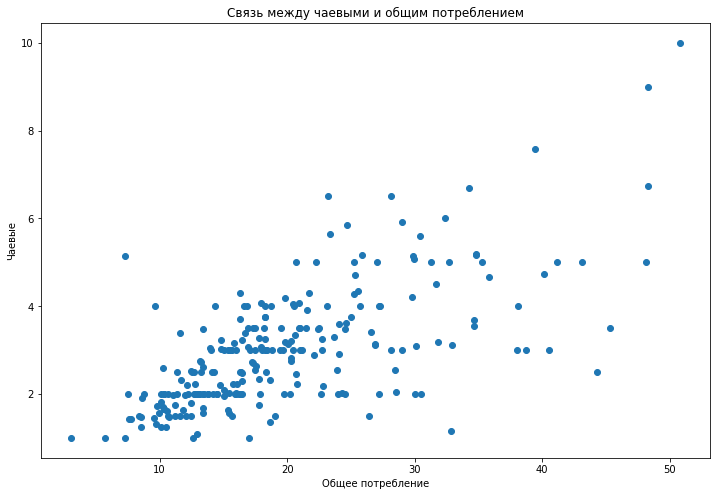

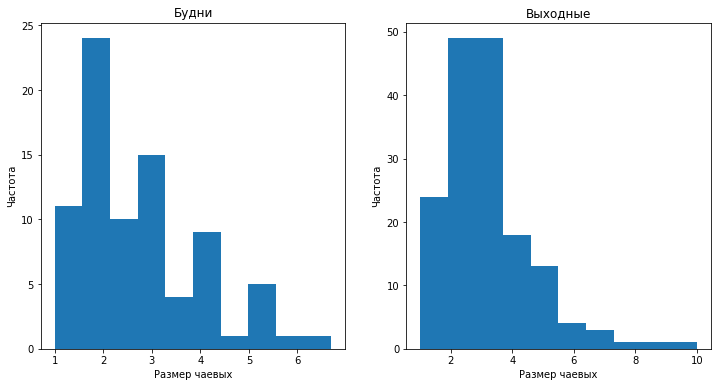

In [6]:
# Строим диаграмму разброса

data = pd.read_csv('tips.csv')

plt.figure(figsize=(12, 8))

plt.title('Связь между чаевыми и общим потреблением')
plt.xlabel('Общее потребление')
plt.ylabel('Чаевые')
plt.scatter(data.total_bill, data.tip)

plt.show()
print()

# Строим гистограммы чаевых в зависимости от дней недели

data = pd.read_csv('tips.csv')
wknd = data.day.unique()[:2]
weekends = data[data.day.isin(wknd)]
weekdays = data[~data.day.isin(wknd)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Будни')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(weekdays.tip, bins = 10)

plt.subplot(1, 2, 2)
plt.title('Выходные')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(weekends.tip, bins = 10)

plt.show()

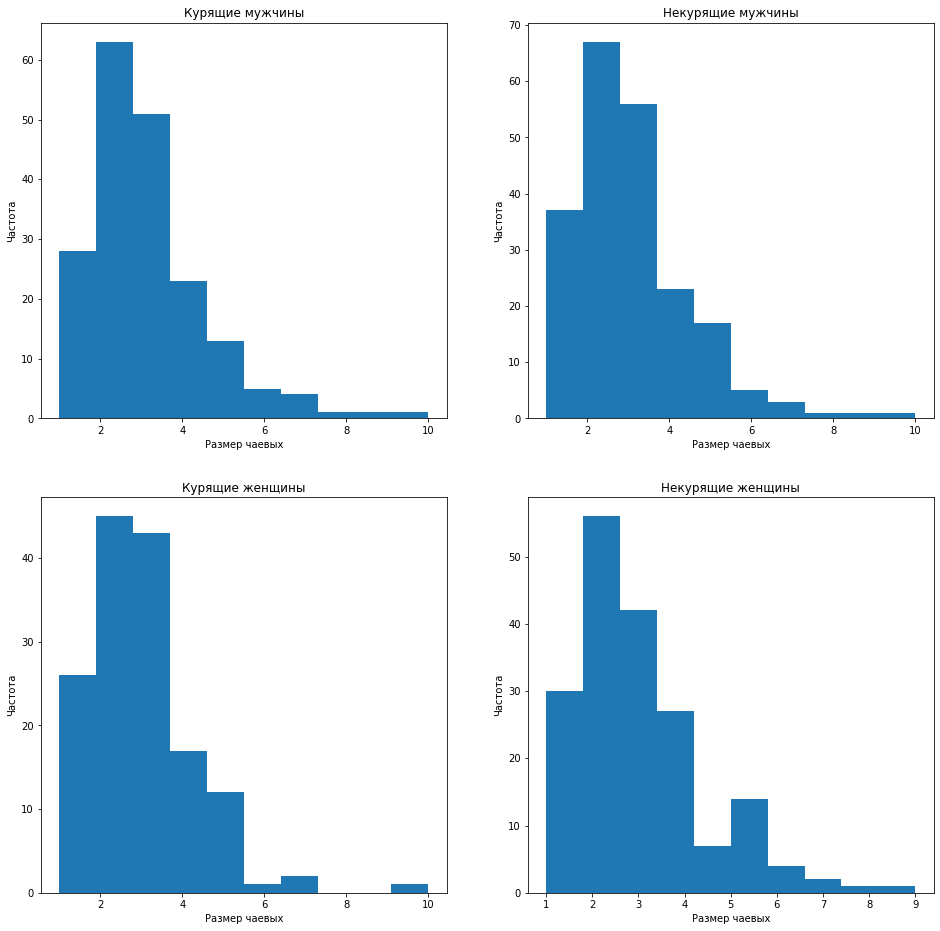

In [7]:
# Строим гистограммы чаевых в зависимости от пола и курения

data = pd.read_csv('tips.csv')
men_smokers = data[(data.sex == 'Male') | (data.smoker == 'Yes')]
men_nonsmokers = data[(data.sex == 'Male') | (data.smoker == 'No')]
women_smokers = data[(data.sex == 'Female') | (data.smoker == 'Yes')]
women_nonsmokers = data[(data.sex == 'Female') | (data.smoker == 'No')]

plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.title('Курящие мужчины')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(men_smokers.tip, bins = 10)

plt.subplot(2, 2, 2)
plt.title('Некурящие мужчины')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(men_nonsmokers.tip, bins = 10)

plt.subplot(2, 2, 3)
plt.title('Курящие женщины')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(women_smokers.tip, bins = 10)

plt.subplot(2, 2, 4)
plt.title('Некурящие женщины')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.hist(women_nonsmokers.tip, bins = 10)

plt.show()

Задание 4. Для файла devices.csv постройте тепловую карту по столбцам. Оси подписать.

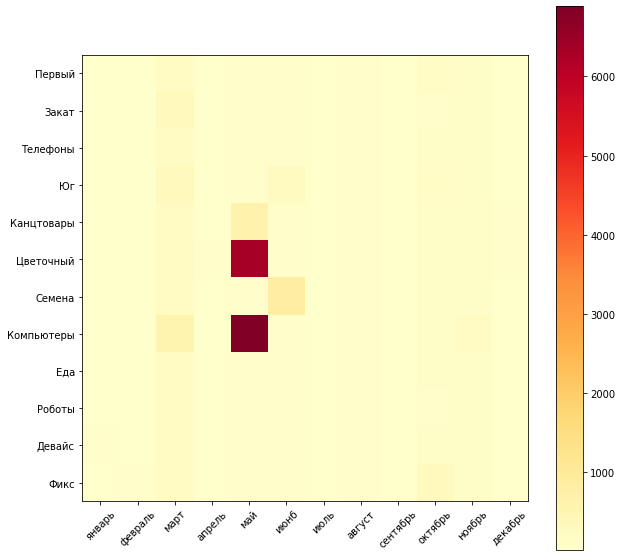

In [8]:
# Строим тепловую карту

data = pd.read_csv('devices.csv')

table = data.iloc[:, 1:]
shop = data.shop

plt.figure(figsize=(10, 10))
plt.imshow(table, cmap ="YlOrRd")
plt.colorbar()
plt.xticks(range(len(table)), table.columns, rotation=45)
plt.yticks(range(len(shop)), shop)

plt.show()